In [2]:
import numpy
print(numpy.__version__)
import cv2
print(cv2.__version__)
print(cv2.__file__)

1.26.4
4.6.0
/opt/anaconda3/envs/anaconda-ml-ai/lib/python3.10/site-packages/cv2/__init__.py


In [ ]:
import cv2
import os

video_path = "/Users/saurabh/Downloads/sad_vid.mp4"  # <-- change this if needed
output_folder = "/Users/saurabh/VidClassifier/video_frames/sad"
prefix = "frame"
frame_skip = 1  # save every frame; set to 2, 5, to skip frames

os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    frame_count = 0
    saved_count = 0

    while True:
        success, frame = cap.read()
        if not success:
            break

        if frame_count % frame_skip == 0:
            filename = os.path.join(output_folder, f"{prefix}_{saved_count:05d}.jpg")
            cv2.imwrite(filename, frame)
            saved_count += 1

        frame_count += 1

    cap.release()
    print(f"Done! Saved {saved_count} frames to {output_folder}")

In [35]:

import tensorflow as tf
import os

In [36]:
print(tf.__version__)


2.10.0


In [37]:
pip list

Package                  Version
------------------------ -----------
absl-py                  2.1.0
aiohappyeyeballs         2.4.4
aiohttp                  3.11.10
aiosignal                1.2.0
annotated-types          0.6.0
anyio                    4.7.0
appnope                  0.1.4
asttokens                3.0.0
astunparse               1.6.3
async-timeout            4.0.3
attrs                    24.3.0
Bottleneck               1.4.2
Brotli                   1.0.9
brotlicffi               1.0.9.2
cachetools               5.5.1
certifi                  2025.7.14
cffi                     1.17.1
charset-normalizer       3.3.2
click                    8.1.8
comm                     0.2.1
contourpy                1.3.1
cryptography             41.0.3
cycler                   0.11.0
datasets                 2.12.0
debugpy                  1.8.11
decorator                5.1.1
dill                     0.3.6
distro                   1.9.0
exceptiongroup           1.2.0
executing        

In [38]:
import cv2
import imghdr

In [39]:
data_dir =  '/Users/saurabh/Downloads/data1' 

In [40]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [41]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             print(image_path)
#             print(tip)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)

In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [43]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [48]:
data = tf.keras.utils.image_dataset_from_directory('/Users/saurabh/Downloads/data1')

Found 340 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [54]:


batch = data_iterator.next()
    


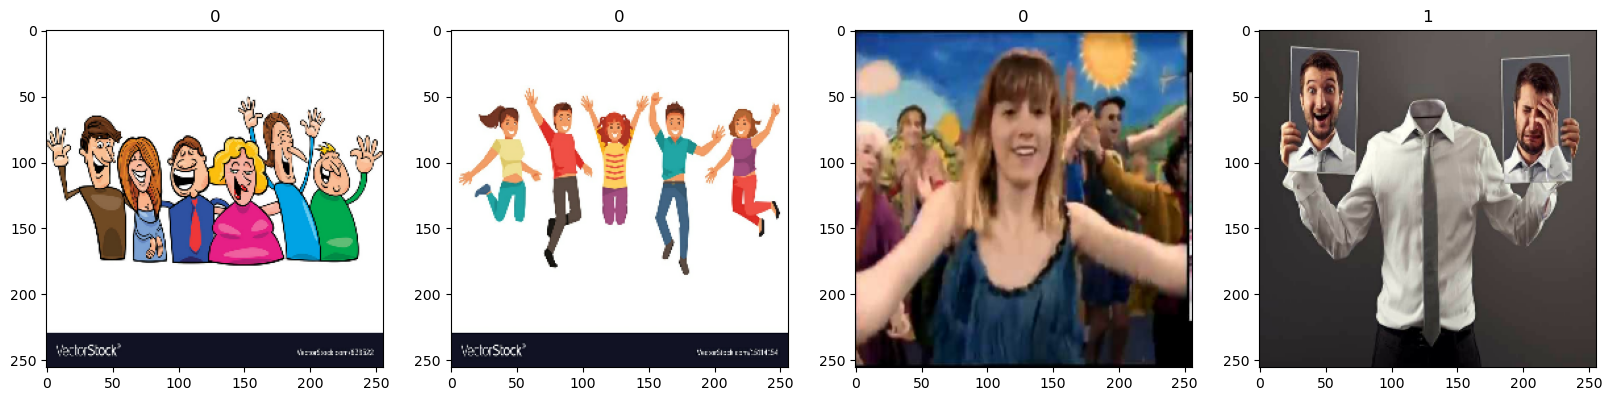

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [56]:
data = data.map(lambda x,y: (x/255,y))

In [57]:
data.as_numpy_iterator().next()

(array([[[[0.16470589, 0.17116268, 0.17140013],
          [0.16470589, 0.16862746, 0.18799786],
          [0.16470589, 0.17163756, 0.17045037],
          ...,
          [0.9520297 , 0.9049709 , 0.8500689 ],
          [0.9452066 , 0.89814776, 0.8432458 ],
          [0.95218843, 0.9051296 , 0.85022765]],
 
         [[0.16470589, 0.17116268, 0.17140013],
          [0.16470589, 0.16862746, 0.18431373],
          [0.16470589, 0.17221078, 0.16930392],
          ...,
          [0.95392275, 0.9068639 , 0.851962  ],
          [0.94509804, 0.8980392 , 0.84313726],
          [0.9524267 , 0.90536785, 0.8504659 ]],
 
         [[0.16470589, 0.17254902, 0.16355698],
          [0.16470589, 0.16862746, 0.1764706 ],
          [0.16470589, 0.17254902, 0.16862746],
          ...,
          [0.9559513 , 0.90889245, 0.8539905 ],
          [0.94790137, 0.90084255, 0.8459406 ],
          [0.9529412 , 0.90588236, 0.8509804 ]],
 
         ...,
 
         [[0.16862746, 0.16862746, 0.16862746],
          [0.16862

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [59]:
train_size

7

In [60]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [61]:
train


<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [63]:
model = Sequential()


In [64]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [65]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [66]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [67]:
logdir='logs'


In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 [==============================] - 11s 1s/step - loss: 0.9389 - accuracy: 0.5938 - val_loss: 0.8129 - val_accuracy: 0.1875
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.6806 - accuracy: 0.5759 - val_loss: 0.5425 - val_accuracy: 0.7812
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.5122 - accuracy: 0.7679 - val_loss: 0.5182 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.4908 - accuracy: 0.7768 - val_loss: 0.4425 - val_accuracy: 0.8594
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.4916 - accuracy: 0.7812 - val_loss: 0.3962 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 11s 1s/step - loss: 0.4693 - accuracy: 0.8080 - val_loss: 0.3852 - val_accuracy: 0.8125
Epoch 7/20
7/7 [==============================] - 11s 1s/step - loss: 0.4054 - accuracy: 0.8259 - val_loss: 0.3800 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

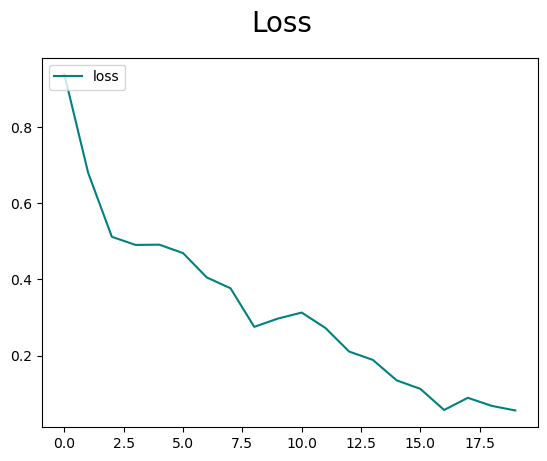

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
# plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

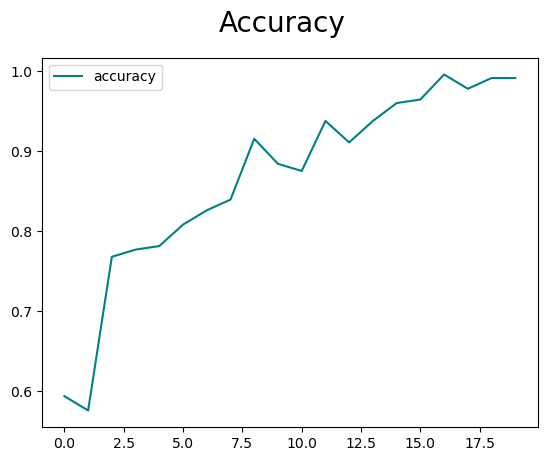

In [71]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
# plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [72]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [73]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [74]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 255ms/step


In [75]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [76]:
data_dir1 = '/Users/saurabh/VidClassifier/video_frames/sad'

In [77]:
happy_count = 0
sad_count = 0
for image_class in os.listdir(data_dir1):
    print(data_dir1)
    print(image_class)
    image_path = os.path.join(data_dir1, image_class)
    print(image_path)
    img = cv2.imread(image_path)
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255, 0))
    if yhat > 0.5:
        sad_count += 1
    else:
        happy_count += 1
print(happy_count)
print(sad_count)
        

        
        
        

        

/Users/saurabh/VidClassifier/video_frames/sad
frame_00273.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00273.jpg
1/1 [==============================] - 0s 85ms/step
/Users/saurabh/VidClassifier/video_frames/sad
frame_00267.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00267.jpg
1/1 [==============================] - 0s 29ms/step
/Users/saurabh/VidClassifier/video_frames/sad
frame_00298.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00298.jpg
1/1 [==============================] - 0s 31ms/step
/Users/saurabh/VidClassifier/video_frames/sad
frame_00059.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00059.jpg
1/1 [==============================] - 0s 29ms/step
/Users/saurabh/VidClassifier/video_frames/sad
frame_00071.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00071.jpg
1/1 [==============================] - 0s 32ms/step
/Users/saurabh/VidClassifier/video_frames/sad
frame_00065.jpg
/Users/saurabh/VidClassifier/video_frames/sad/frame_00065.

In [78]:
if yhat > 0.5:
    print("Predicted class is Sad")
else:
    print("Predicted class is Happy")

Predicted class is Sad


In [79]:
from tensorflow.keras.models import load_model


In [80]:
model.save(os.path.join('models','imageclassifier.h5'))
